In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Reliance stock ka data (last 6 months)
df = yf.download("RELIANCE.NS", period="6mo")

df = df.reset_index()
df['Day'] = df.index
df.shape


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10180\2360456929.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("RELIANCE.NS", period="6mo")
[*********************100%***********************]  1 of 1 completed


122

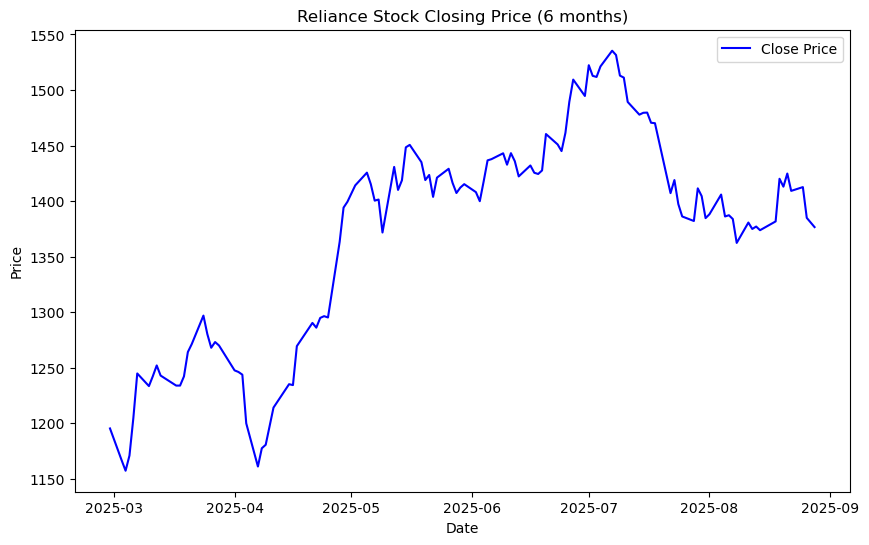

In [8]:
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Close'], label="Close Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Reliance Stock Closing Price (6 months)")
plt.legend()
plt.show()


In [9]:
X = df[['Day']]
y = df['Close']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print("R² Score:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))

R² Score: 0.5051918132781228
MSE: 4583.677197410079


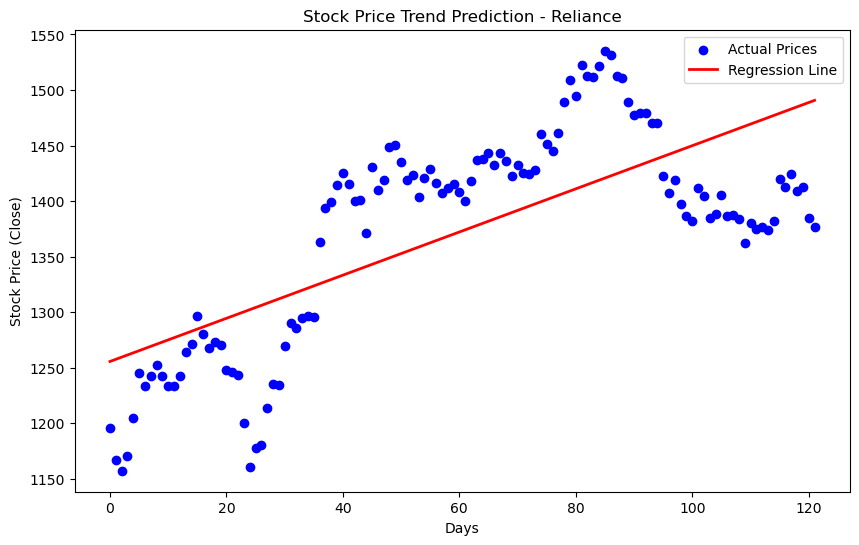

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(df['Day'], y, color="blue", label="Actual Prices")
plt.plot(df['Day'], y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Days")
plt.ylabel("Stock Price (Close)")
plt.title("Stock Price Trend Prediction - Reliance")
plt.legend()
plt.show()

In [12]:
future_days = np.array(range(len(df), len(df)+10)).reshape(-1,1)
future_pred = model.predict(future_days)

print("Next 10 days prediction:")
print(future_pred)

Next 10 days prediction:
[[1492.62739045]
 [1494.56989529]
 [1496.51240012]
 [1498.45490496]
 [1500.39740979]
 [1502.33991463]
 [1504.28241946]
 [1506.2249243 ]
 [1508.16742913]
 [1510.10993397]]
